In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
data = pd.read_excel("D:\\ishita\\py projects\\Meta Banking Adoption\\Metabanking.xlsx")

# Display the first few rows
data.head().style.set_properties(**{"background-color": "dimgrey","color":"Yellow","border": "1.5px solid Yellow"})

,ID,AR-VR,Age,Gender,Education,Online - Mobile banking,Enj1,Enj2,Enj3,Enj4,Comp1,Comp2,Comp3,Perf1,Perf2,Perf3,Perf4,PEU1,PEU2,PEU3,PEU4,Fcon1,Fcon2,Fcon3,Fcon4,Str1,Str2,Str3,Str4,Inno1,Inno2,Inno3,Inno4,Val1,Val2,Val3,Val4,Trt1,Trt2,Trt3,Trt4,Int1,Int2,Int3,Int4
0,1,2,3,2,3,2,2,4,4,3,3,3,3,3,3,3,3,3,4,3,2,3,3,3,2,2,3,3,3,3,3,4,2,3,4,4,4,4,4,5,3,1,4,3,2
1,2,2,1,1,1,2,4,3,4,4,3,4,4,4,2,3,3,2,3,3,3,3,4,3,3,5,3,3,3,3,3,4,2,4,4,4,3,4,4,5,4,2,3,4,3
2,3,2,1,1,2,1,2,1,3,1,4,4,3,2,2,5,2,1,2,3,2,1,1,1,1,4,2,4,3,1,1,2,1,2,2,2,2,2,3,2,2,2,2,1,2
3,4,2,1,1,2,1,3,2,2,3,3,3,2,2,4,3,3,1,1,2,1,1,2,1,1,5,3,5,4,2,3,2,2,1,1,1,1,3,2,3,3,2,1,2,3
4,5,2,1,1,1,1,4,3,4,3,2,4,3,3,3,3,3,2,4,2,3,3,3,4,4,4,4,3,5,3,1,4,2,3,3,3,3,3,3,3,3,3,3,3,3


In [3]:
# Get the number of rows and columns
data.shape

(312, 45)

In [4]:
# Get the column names
data.columns

Index(['ID', 'AR-VR', 'Age', 'Gender', 'Education', 'Online - Mobile banking',
       'Enj1', 'Enj2', 'Enj3', 'Enj4', 'Comp1', 'Comp2', 'Comp3', 'Perf1',
       'Perf2', 'Perf3', 'Perf4', 'PEU1', 'PEU2', 'PEU3', 'PEU4', 'Fcon1',
       'Fcon2', 'Fcon3', 'Fcon4', 'Str1', 'Str2', 'Str3', 'Str4', 'Inno1',
       'Inno2', 'Inno3', 'Inno4', 'Val1', 'Val2', 'Val3', 'Val4', 'Trt1',
       'Trt2', 'Trt3', 'Trt4', 'Int1', 'Int2', 'Int3', 'Int4'],
      dtype='object')

In [5]:
# Check for missing values
data.isnull().sum()

ID                         0
AR-VR                      0
Age                        0
Gender                     0
Education                  0
Online - Mobile banking    0
Enj1                       0
Enj2                       0
Enj3                       0
Enj4                       0
Comp1                      0
Comp2                      0
Comp3                      0
Perf1                      0
Perf2                      0
Perf3                      0
Perf4                      0
PEU1                       0
PEU2                       0
PEU3                       0
PEU4                       0
Fcon1                      0
Fcon2                      0
Fcon3                      0
Fcon4                      0
Str1                       0
Str2                       0
Str3                       0
Str4                       0
Inno1                      0
Inno2                      0
Inno3                      0
Inno4                      0
Val1                       0
Val2          

In [6]:
# Defining average variables

# average adoption intention
adoption_cols = ['Int1', 'Int2', 'Int3', 'Int4']
data['Mean_Intention'] = data[adoption_cols].mean(axis=1)

# average ease of use
ease_of_use_cols = ['PEU1', 'PEU2', 'PEU3', 'PEU4']
data['Mean_Ease_of_Use'] = data[ease_of_use_cols].mean(axis=1)

# average usefullness
usefulness_cols = ['Perf1', 'Perf2', 'Perf3', 'Perf4']
data['Mean_Usefulness'] = data[usefulness_cols].mean(axis=1)

# average technostress
technostress_cols = ["Str1", "Str2", "Str3", "Str4"]
data['Mean_Technostress'] = data[technostress_cols].mean(axis=1)

# average compatibility
compatibility_cols = ["Comp1", "Comp2", "Comp3"]
data['Mean_Compatibility'] = data[compatibility_cols].mean(axis=1)

# average enjoyment
enjoyment_cols = ["Enj1", "Enj2", "Enj3", "Enj4"]
data['Mean_Enjoyment'] = data[enjoyment_cols].mean(axis=1)

# average conditions
conditions_cols = ["Fcon1", "Fcon2", "Fcon3", "Fcon4"]
data['Mean_Conditions'] = data[conditions_cols].mean(axis=1)

# average innovation
innovation_cols = ["Inno1", "Inno2", "Inno3", "Inno4"]
data['Mean_Innovation'] = data[innovation_cols].mean(axis=1)

# average trust
trust_cols = ["Trt1", "Trt2", "Trt3", "Trt4"]
data['Mean_Trust'] = data[trust_cols].mean(axis=1)

# average perceived value
perceived_value_cols = ["Val1", "Val2", "Val3", "Val4"]
data['Mean_Percieved_Value'] = data[perceived_value_cols].mean(axis=1)

In [7]:
import scipy.stats as stats
import statsmodels.api as sm

# Function to check normality 
def check_normality(data, categorical_col, continous_col):
    categories = data[categorical_col].unique()
    
    for level in categories:
        subset = data[data[categorical_col] == level][continous_col]
        
        print(f"Normality check for {categorical_col} Level: {level}")
        
        # Shapiro-Wilk test for normality
        stat, p_value = stats.shapiro(subset)
        print(f"Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}\n")
        
        # Histogram
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        sns.histplot(subset, kde=True, bins=10)
        plt.title(f"Histogram for {categorical_col} Level {level}")
        
        # Q-Q plot
        plt.subplot(1, 2, 2)
        sm.qqplot(subset, line='s')
        plt.title(f"Q-Q Plot for {categorical_col} Level {level}")
        
        plt.show()


Adoption Intention V/S Demographics

1) Does Education Level influence the intention to use meta banking?

Normality check for Education Level: 3
Shapiro-Wilk Test Statistic: 0.9638828039169312, p-value: 3.258608921896666e-05



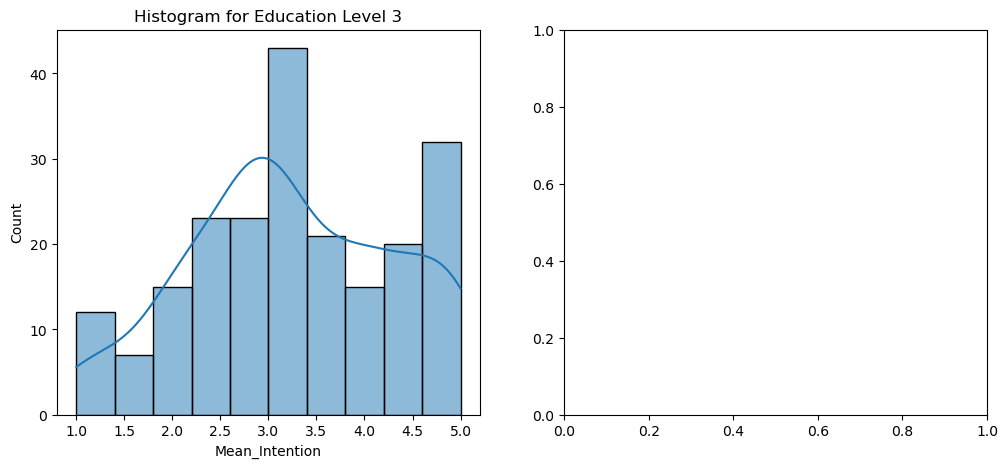

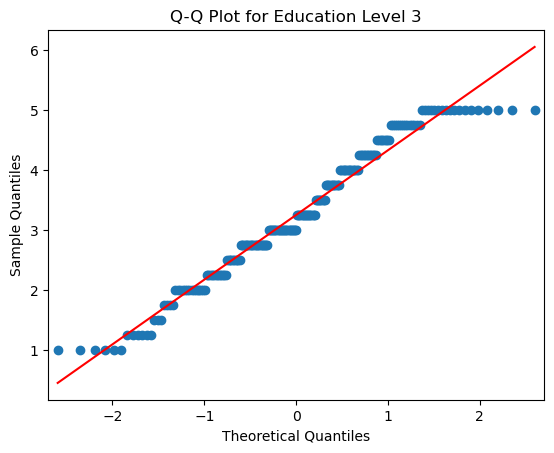

Normality check for Education Level: 1
Shapiro-Wilk Test Statistic: 0.960544764995575, p-value: 0.21022331714630127



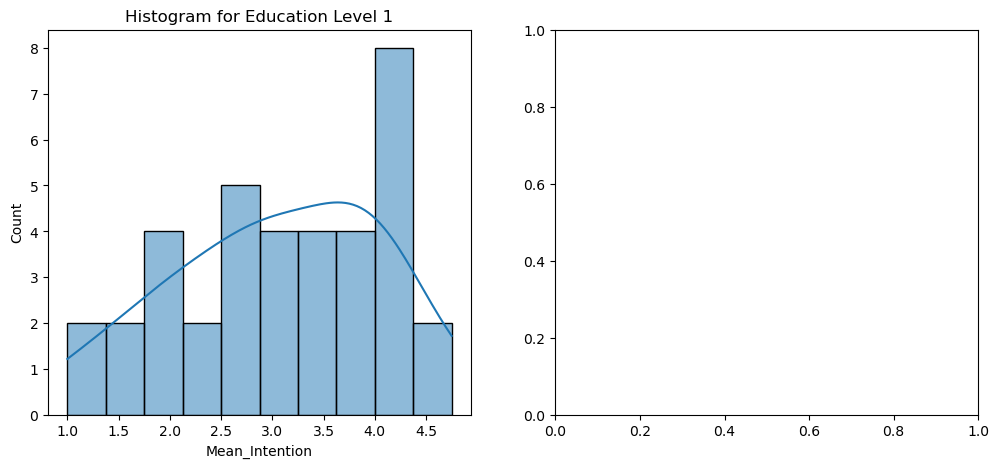

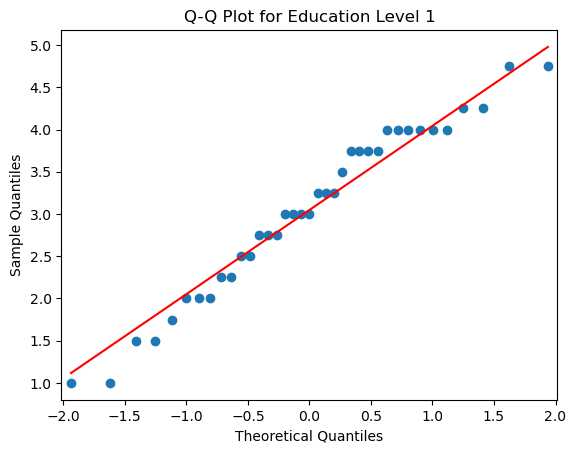

Normality check for Education Level: 2
Shapiro-Wilk Test Statistic: 0.9487840533256531, p-value: 0.09575076401233673



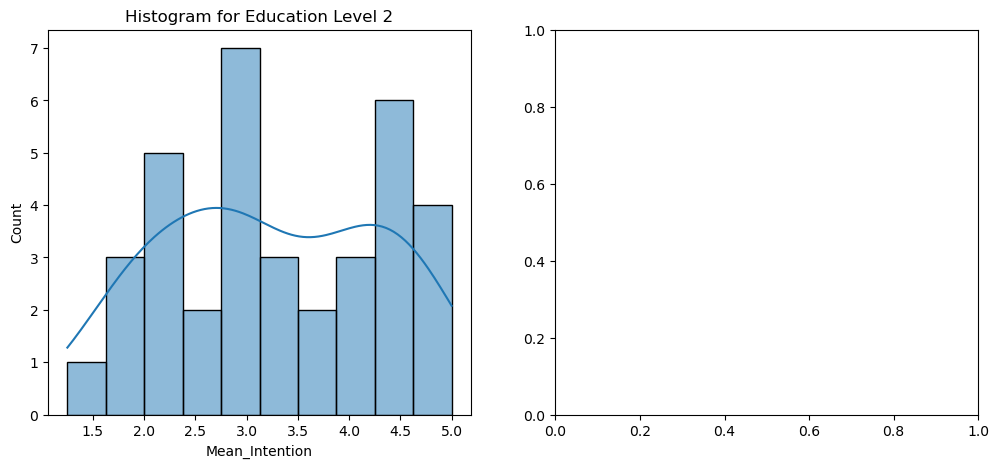

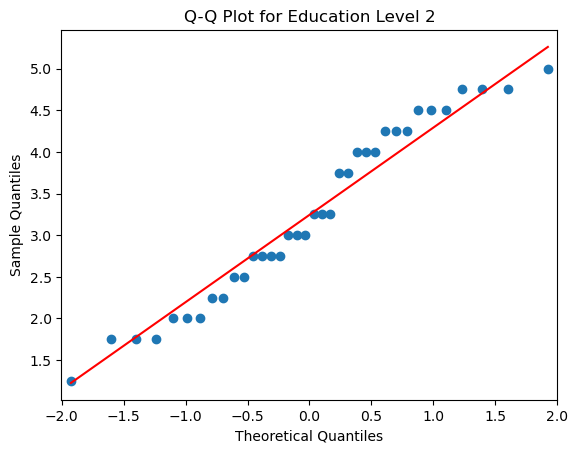

Normality check for Education Level: 4
Shapiro-Wilk Test Statistic: 0.9107107520103455, p-value: 0.02056771144270897



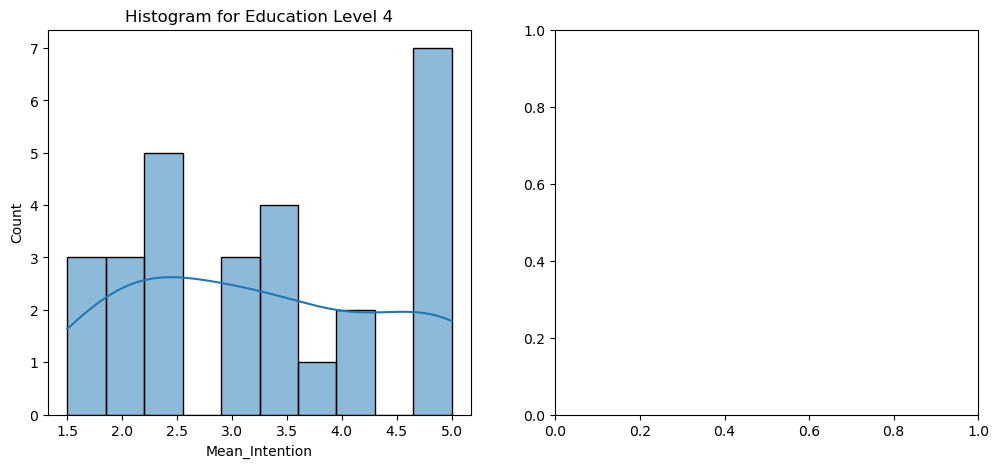

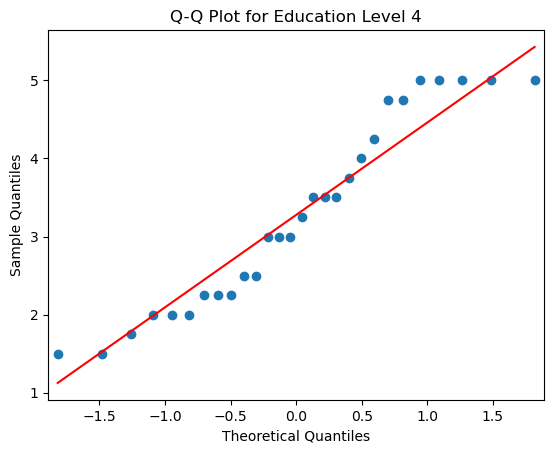

In [8]:
# normality test
check_normality(data, categorical_col='Education', continous_col='Mean_Intention')

In [9]:
# Kruskal-Wallis Test
from scipy.stats import kruskal
groups = [data['Mean_Intention'][data['Education'] == i] for i in data['Education'].unique()]
statistic, p_value = kruskal(*groups)
print(f"Kruskal-Wallis Statistic: {statistic}, P-value: {p_value}")

Kruskal-Wallis Statistic: 0.9357663401464758, P-value: 0.8167891013093808


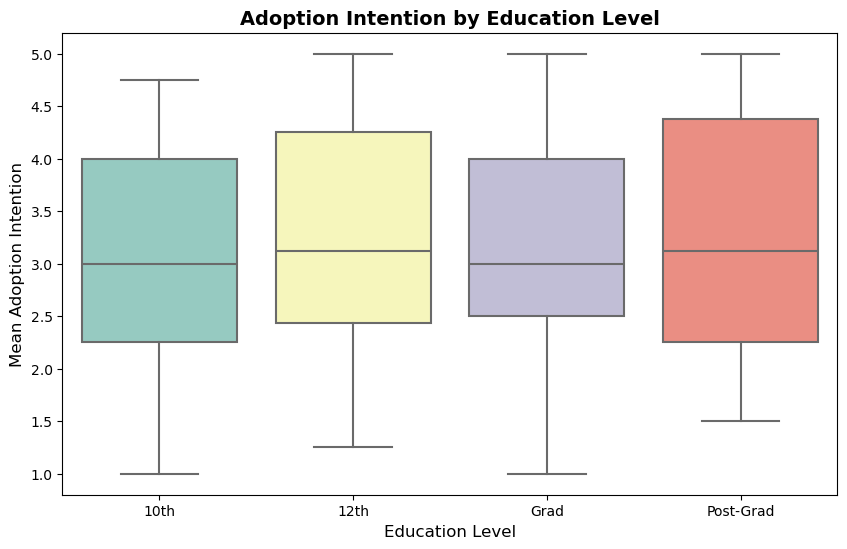

In [10]:
# Visualization: Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Mean_Intention', data=data, palette='Set3')
plt.title('Adoption Intention by Education Level', fontsize=14, fontweight='bold')
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Mean Adoption Intention', fontsize=12)
plt.xticks([0, 1, 2, 3], ['10th', '12th', 'Grad', 'Post-Grad'])
plt.show()

2) Does Age influence the intention to use meta banking?

Normality check for Age Level: 3
Shapiro-Wilk Test Statistic: 0.9524772763252258, p-value: 0.005518963560461998



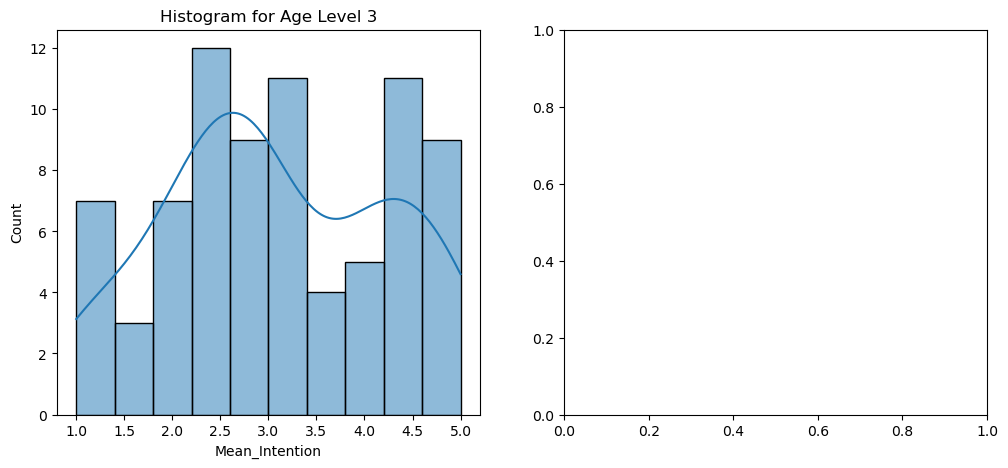

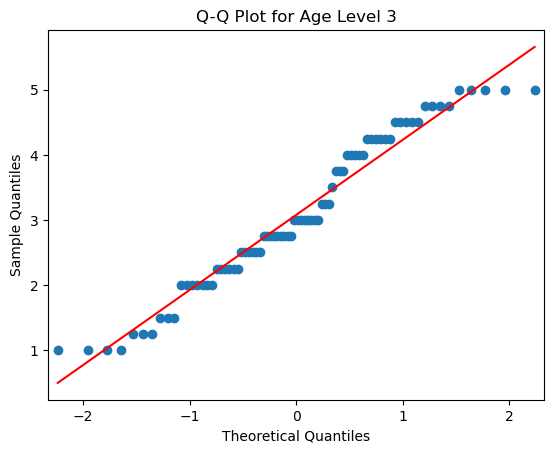

Normality check for Age Level: 1
Shapiro-Wilk Test Statistic: 0.9561206102371216, p-value: 0.026554744690656662



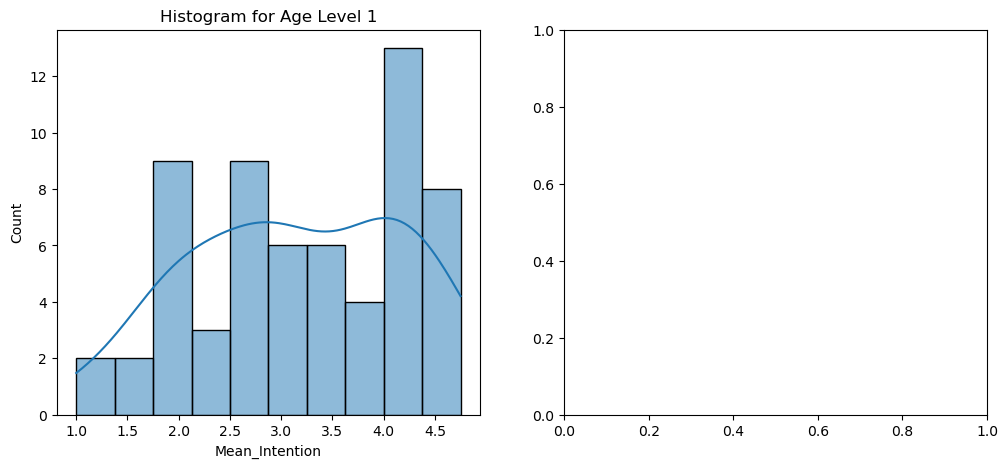

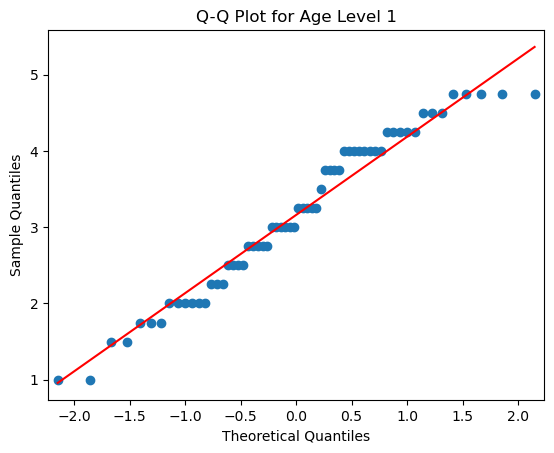

Normality check for Age Level: 2
Shapiro-Wilk Test Statistic: 0.9609910845756531, p-value: 0.0025200913660228252



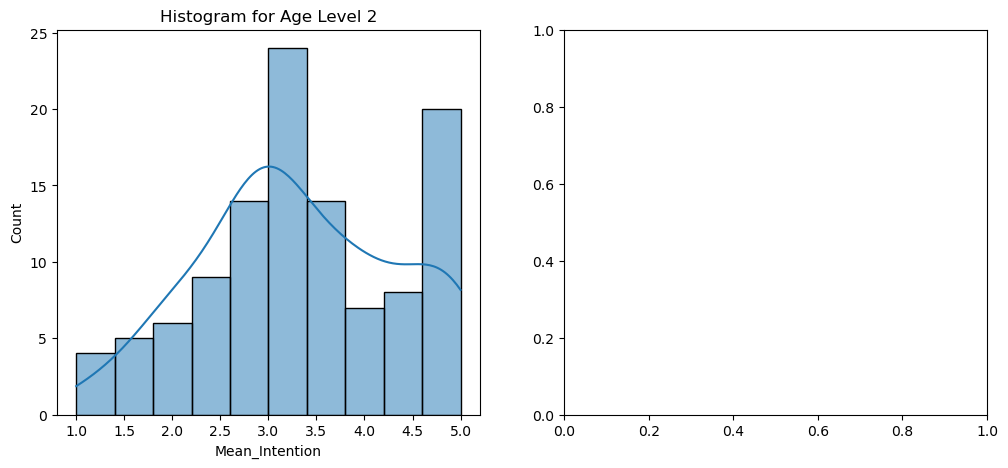

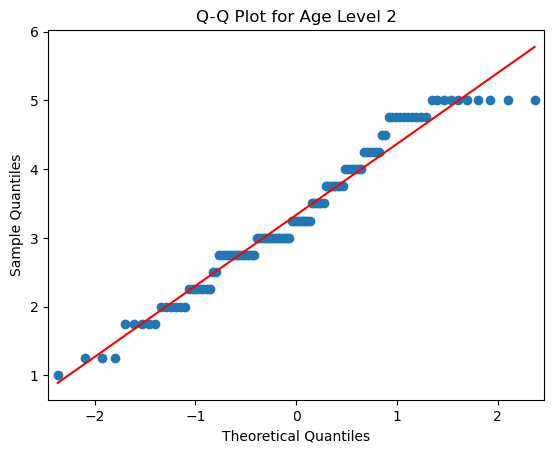

Normality check for Age Level: 4
Shapiro-Wilk Test Statistic: 0.953892171382904, p-value: 0.06632163375616074



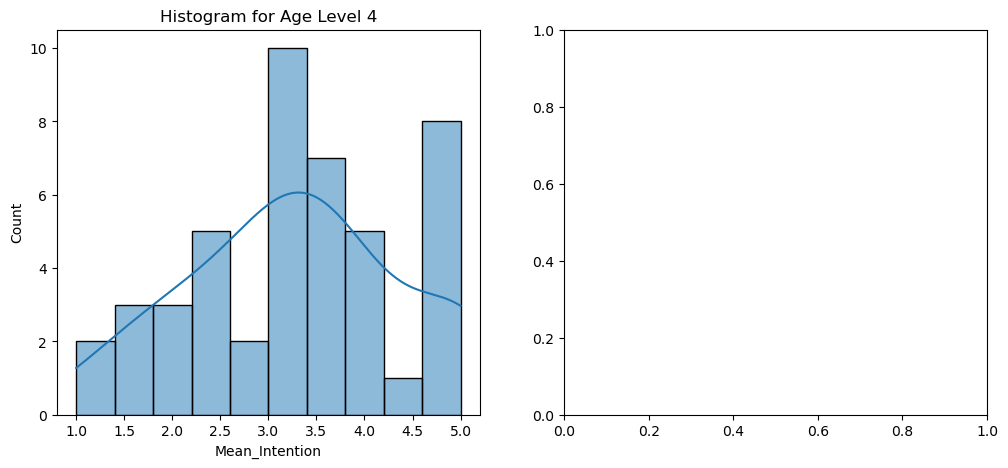

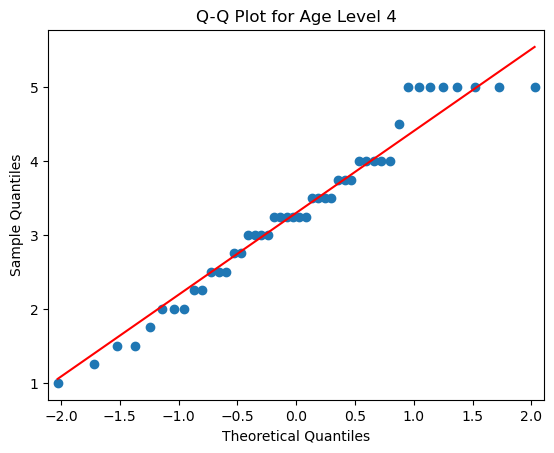

Normality check for Age Level: 5
Shapiro-Wilk Test Statistic: 0.917869508266449, p-value: 0.17873123288154602



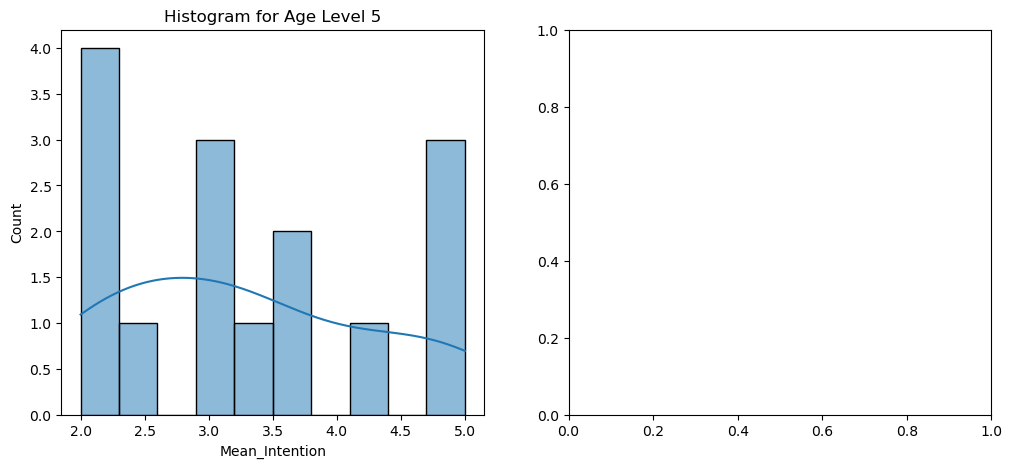

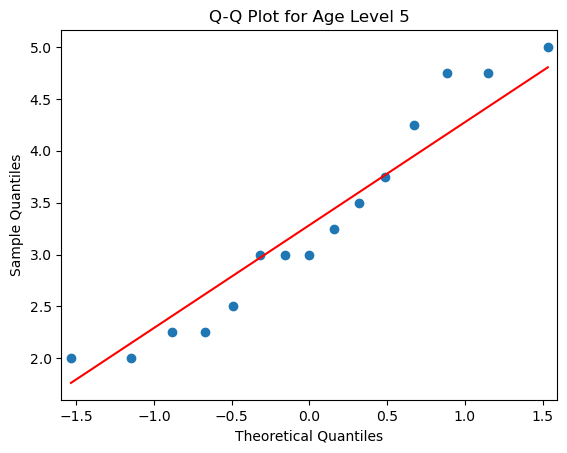

In [11]:
# normality test
check_normality(data, categorical_col='Age', continous_col='Mean_Intention')

In [12]:
# Kruskal-Wallis Test
groups = [data['Mean_Intention'][data['Age'] == i] for i in data['Age'].unique()]
statistic, p_value = kruskal(*groups)
print(f"Kruskal-Wallis Statistic: {statistic}, P-value: {p_value}")

Kruskal-Wallis Statistic: 3.03909070012485, P-value: 0.5513051116378636


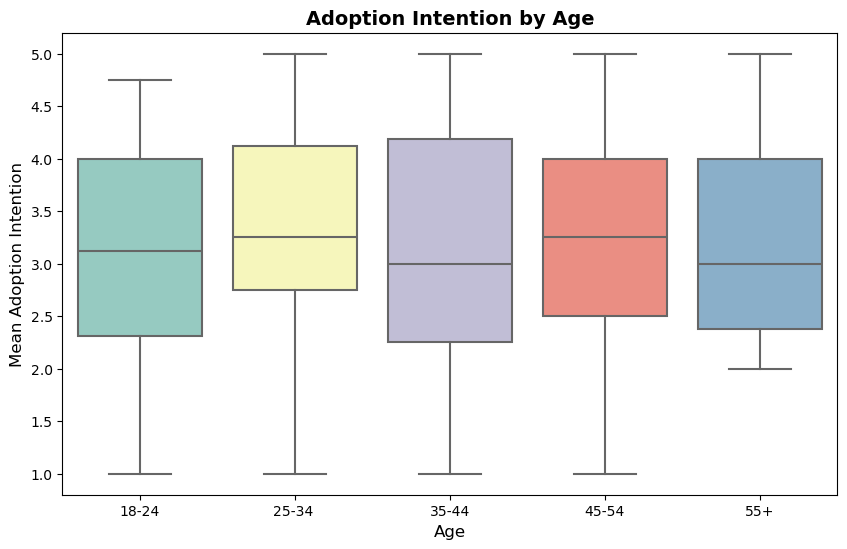

In [13]:
# Visualization: Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Mean_Intention', data=data, palette='Set3')
plt.title('Adoption Intention by Age', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Mean Adoption Intention', fontsize=12)
plt.xticks([0, 1, 2, 3, 4], ['18-24', '25-34 ', '35-44', '45-54', '55+'])
plt.show()

3) Does Gender influence the intention to use meta banking?

Normality check for Gender Level: 2
Shapiro-Wilk Test Statistic: 0.9581117630004883, p-value: 0.0006320959655568004



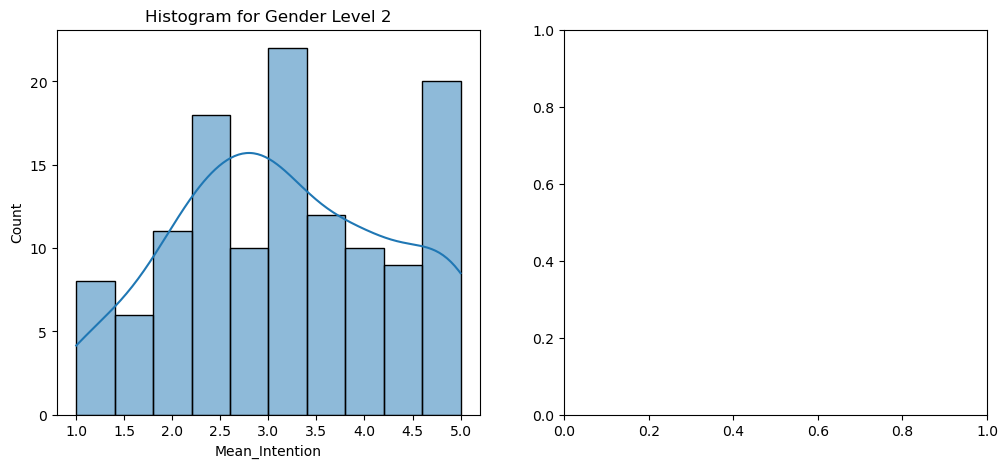

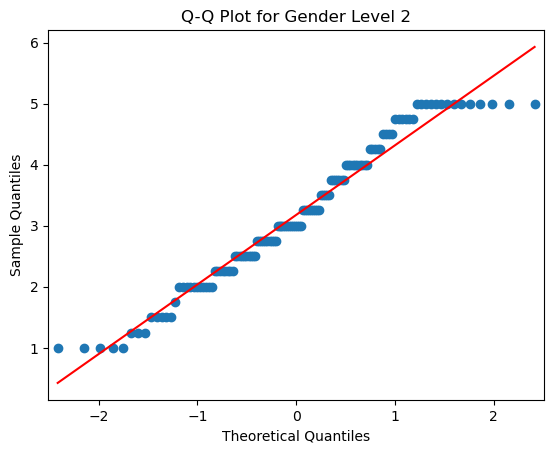

Normality check for Gender Level: 1
Shapiro-Wilk Test Statistic: 0.9681445360183716, p-value: 0.00030350731685757637



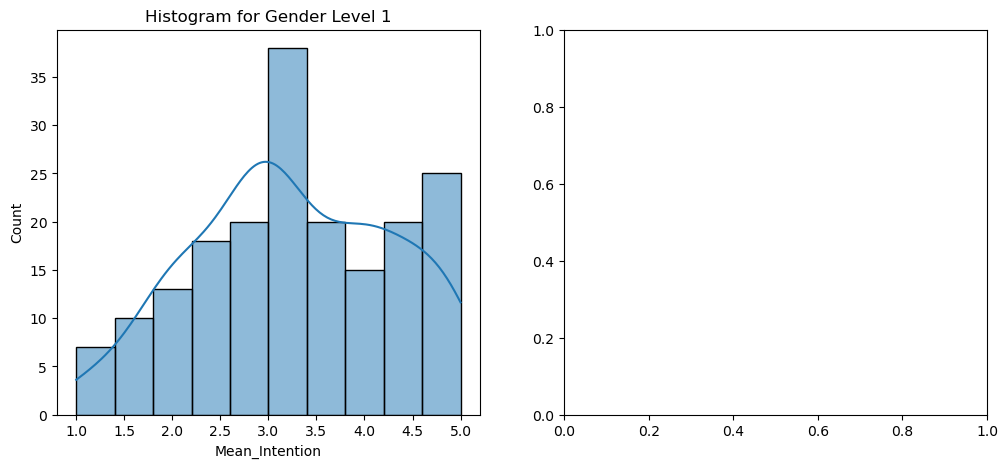

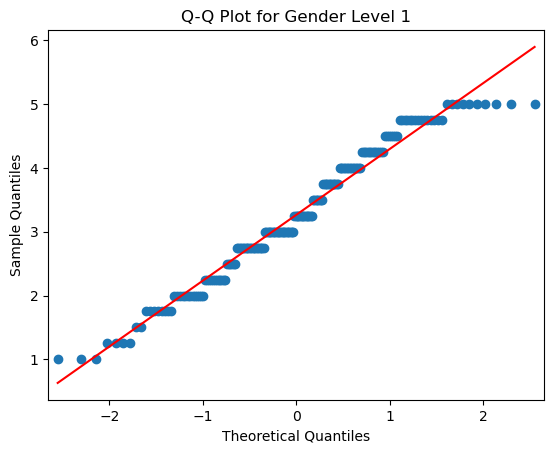

In [14]:
# normality test
check_normality(data, categorical_col='Gender', continous_col='Mean_Intention')

In [15]:
# Mann-Whitney U Test
male = data[data['Gender'] == 1]['Mean_Intention']
female = data[data['Gender'] == 2]['Mean_Intention']
u_statistic, p_value = stats.mannwhitneyu(male, female, alternative='two-sided')
print(f"U-statistic: {u_statistic}, P-value: {p_value}")

U-statistic: 12226.5, P-value: 0.5146807139088432


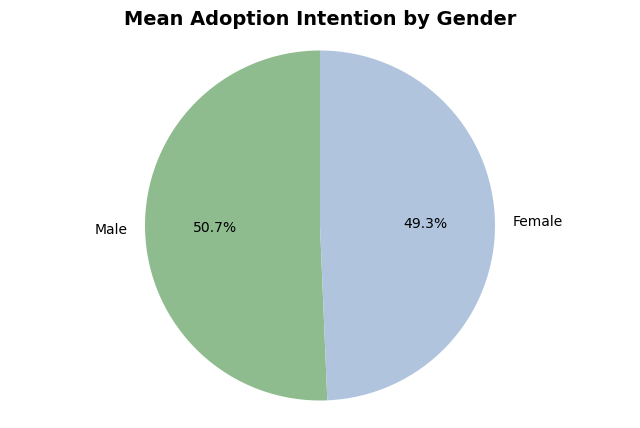

In [16]:
#Visualization: Pie Chart
mean_intention_by_gender = data.groupby('Gender')['Mean_Intention'].mean()  
labels = {1: 'Male', 2: 'Female'}  # Map the gender values to their string labels 
mean_intention_by_gender.index = mean_intention_by_gender.index.map(labels)  
plt.figure(figsize=(8, 5))  
plt.pie(mean_intention_by_gender, labels=mean_intention_by_gender.index, autopct='%1.1f%%', startangle=90, colors=['darkseagreen', 'lightsteelblue'])  
plt.title('Mean Adoption Intention by Gender', fontsize=14, fontweight='bold')  
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.   
plt.show() 

Adoption Intention V/S Perceieved Ease of Use

In [17]:
# Correlation
correlation, p_value = stats.pearsonr(data['Mean_Ease_of_Use'], data['Mean_Intention'])
print(f"Correlation: {correlation}, P-value: {p_value}\n")

Correlation: 0.3648314978846756, P-value: 2.952683574246286e-11



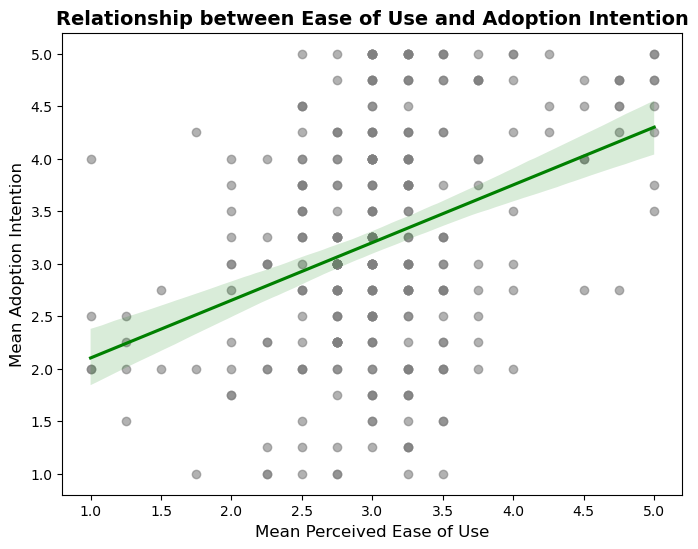

In [18]:
#Visualization
plt.figure(figsize=(8, 6))
sns.regplot(x='Mean_Ease_of_Use', y='Mean_Intention', data=data, color='gray', scatter_kws={'alpha':0.6}, line_kws={'color':'green'}) 
plt.title('Relationship between Ease of Use and Adoption Intention', fontsize=14, fontweight='bold')
plt.xlabel('Mean Perceived Ease of Use', fontsize=12)
plt.ylabel('Mean Adoption Intention', fontsize=12)
plt.show()

Technostress and Adoption Intention

In [19]:
# Correlation
correlation, p_value = stats.pearsonr(data['Mean_Technostress'], data['Mean_Intention'])
print(f"Correlation: {correlation}, P-value: {p_value}\n")

Correlation: -0.38272861460980506, P-value: 2.530944213587949e-12



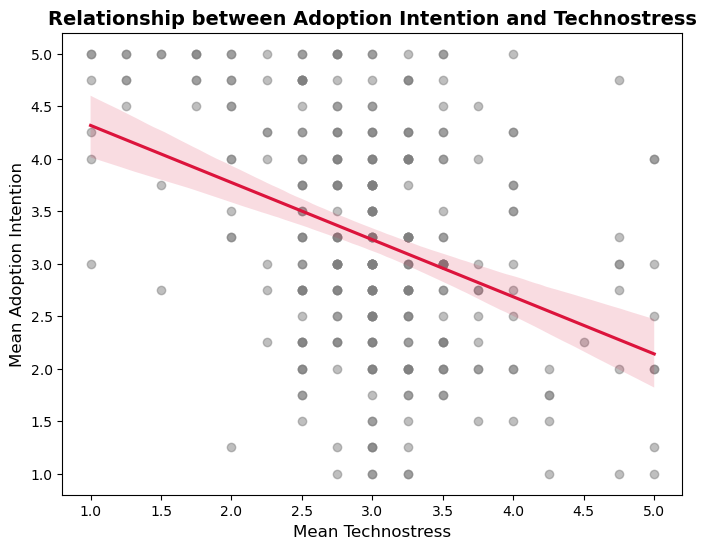

In [20]:
#Visualization
plt.figure(figsize=(8, 6))
sns.regplot(x='Mean_Technostress', y='Mean_Intention', color='gray', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'crimson'})
plt.title('Relationship between Adoption Intention and Technostress', fontsize=14, fontweight='bold')
plt.xlabel('Mean Technostress', fontsize=12)
plt.ylabel('Mean Adoption Intention', fontsize=12)
plt.show()

Impact of Trust on Adoption

In [21]:
import statsmodels.api as sm  
from sklearn.model_selection import train_test_split  

# Defining  features (X) and target (y) variables  
X = data[['Trt1', 'Trt2', 'Trt3', 'Trt4']]  
y = data['Mean_Intention']  

# Perform train-test split (80% train, 20% test)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

# Fit the regression model on the training set  
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()  

# Print the model summary  
print(model.summary())  

# Now you can also make predictions on the test set if needed  
y_pred = model.predict(sm.add_constant(X_test))

                            OLS Regression Results                            
Dep. Variable:         Mean_Intention   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     31.39
Date:                Thu, 13 Mar 2025   Prob (F-statistic):           4.26e-21
Time:                        10:27:15   Log-Likelihood:                -320.29
No. Observations:                 249   AIC:                             650.6
Df Residuals:                     244   BIC:                             668.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3322      0.184      7.226      0.0

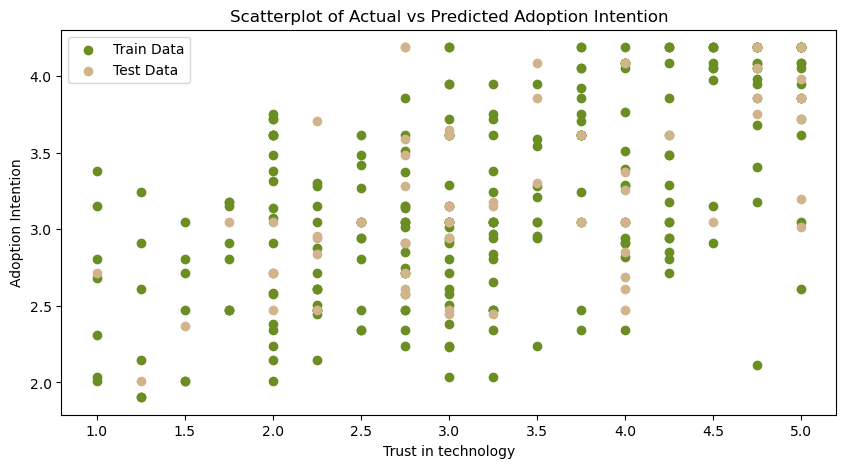

In [22]:
# Scatterplot Visualization
plt.figure(figsize=(10, 5))
plt.scatter(y_train, model.predict(sm.add_constant(X_train)), color='olivedrab', label='Train Data')
plt.scatter(y_test, y_pred, color='tan', label='Test Data')
plt.xlabel('Trust in technology')
plt.ylabel('Adoption Intention')
plt.legend()
plt.title("Scatterplot of Actual vs Predicted Adoption Intention")
plt.show()

In [23]:
# Evaluation of tested data
r2_test = 0.3074 # mentioned in the statsmodel summary
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"R-square (Test): {r2_test}, MAPE (Test): {mape_test:.2f}")

R-square (Test): 0.3074, MAPE (Test): 25.35
